# Labolatorium 3 - Interpolacja

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Wielomiany interpolujące - zadanie 1

In [2]:
def f (x):
    return 1/(1+x**2)

def Pn (x, arr):
    res = 0
    for k in range (len(arr)):
        res += arr[k] * x ** k
    return res

def interpole (n, f, a, b):
    matrix = np.zeros((n+1,n+1), dtype = np.float64)
    vector = np.zeros(n+1, dtype = np.float64)
    i = 0
    for xi in np.linspace(a, b, n+1):
        for k in range (n+1):
            matrix[i,k] = xi ** k
        vector[i] = f(xi)
        i += 1
    #print (matrix)
    #print (vector)
    return np.linalg.solve(matrix, vector)

In [3]:
def draw (n):
    arr = interpole (n, f, -5, 5)
    x = np.linspace(-5, 5, 100)
    fx = np.array([f(t) for t in x])
    Pnx = np.array([Pn(t, arr) for t in x])
    plt.figure(figsize=(15,10))
    plt.plot (x, fx, color = 'r')
    plt.plot (x, Pnx, color = 'b')

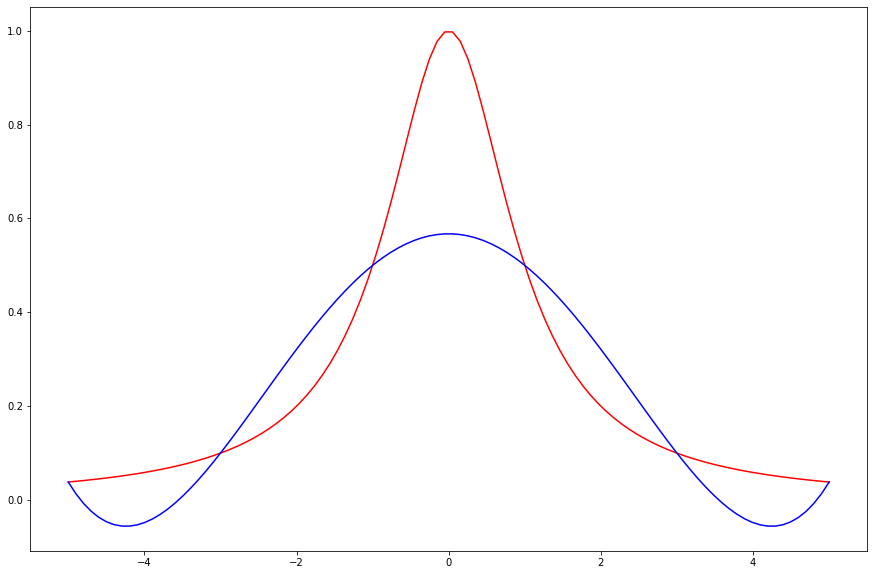

In [4]:
draw (5)

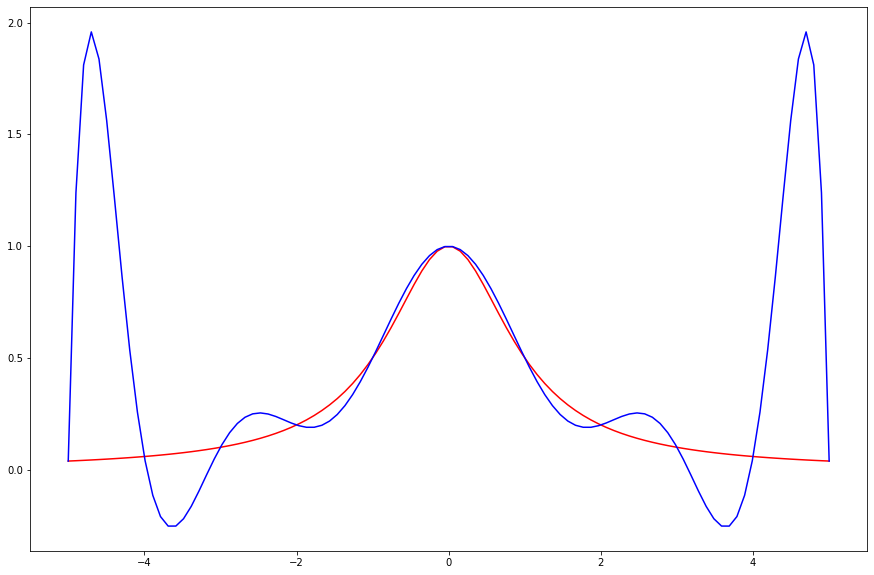

In [5]:
draw (10)

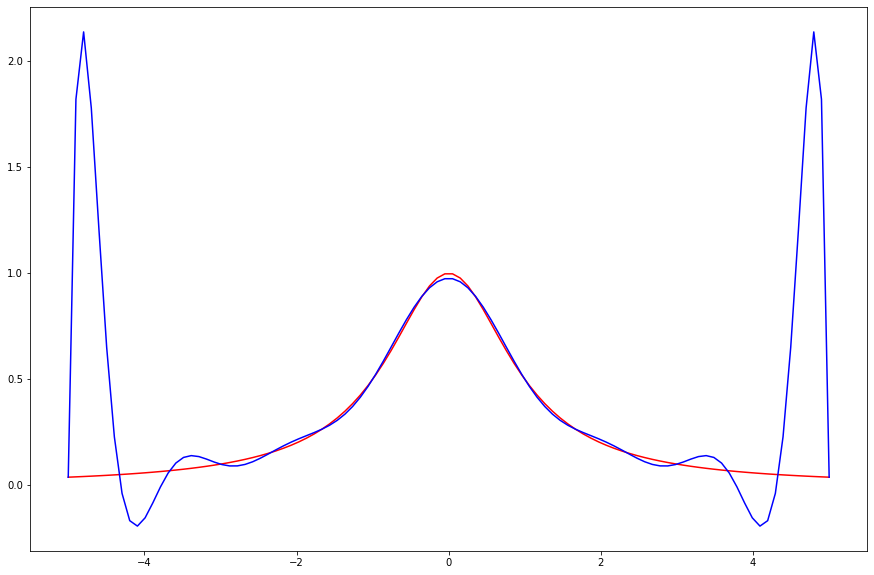

In [6]:
draw (15)

In [7]:
def draw_e (n):
    arr = interpole (n, f, -5, 5)
    x = np.linspace(-5, 5, 30)
    ex = np.array([f(t) - Pn(t, arr) for t in x])
    plt.figure(figsize=(15,10))
    plt.plot (x, ex, color = 'r')

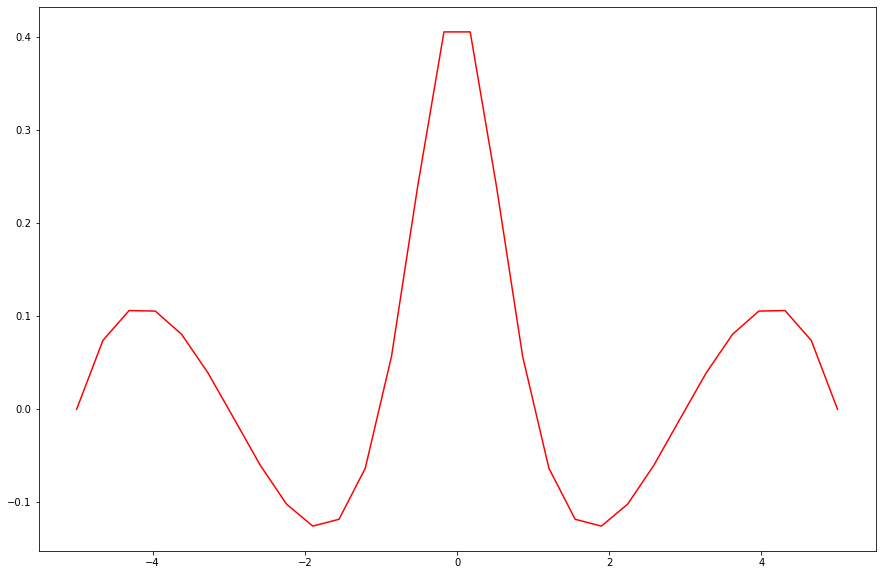

In [8]:
draw_e (5)

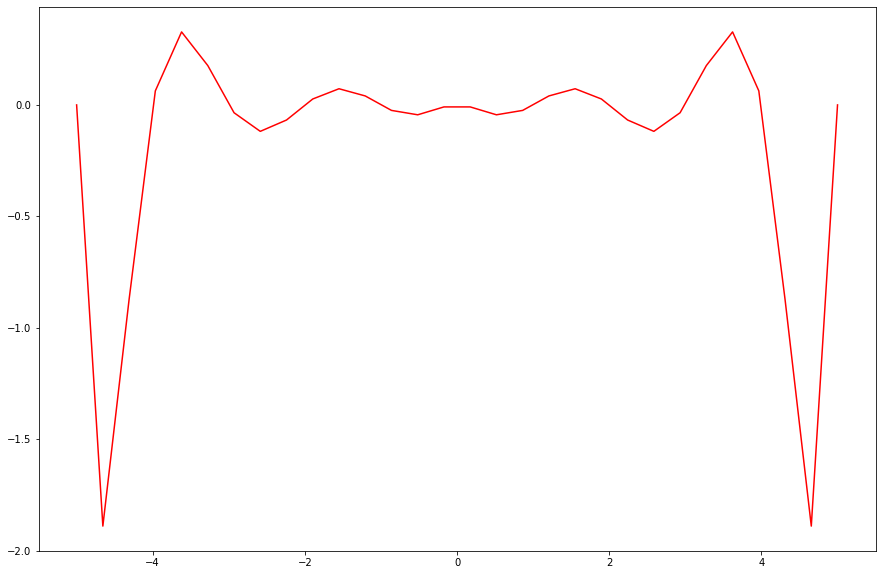

In [9]:
draw_e (10)

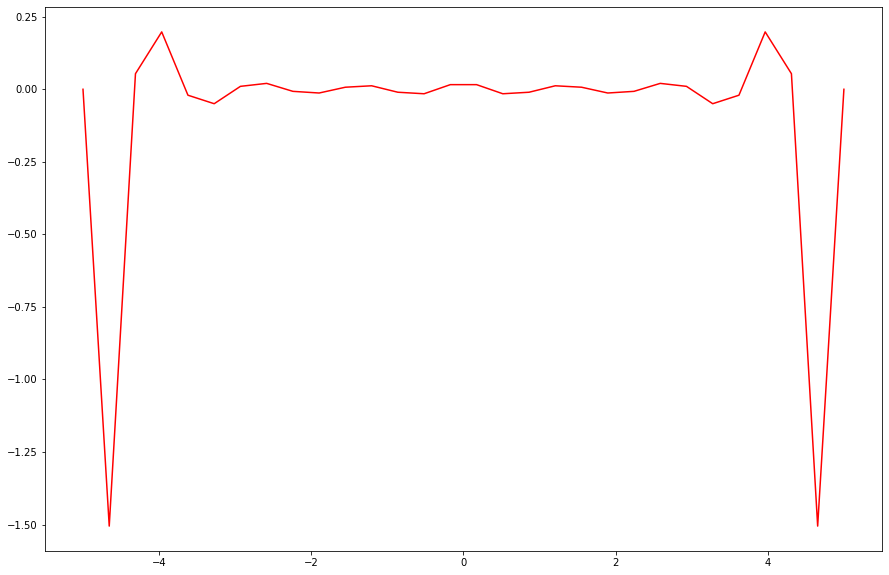

In [10]:
draw_e (15)

## Wielomiany interpolujące - zadanie 2

In [11]:
from math import cos
from math import pi

def Czebyszewa (n, f, a, b):
    matrix = np.zeros((n+2,n+2), dtype = np.float64)
    vector = np.zeros(n+2, dtype = np.float64)
    for i in range (0, n+2):
        if i == 0:
            xi = a
        elif i == n+1:
            xi = b
        else:
            xi = 0.5 * (a + b) + 0.5 * (b - a) * cos (pi * (2*i - 1) / (2 * n))
        print (xi)
        for k in range (n+2):
            matrix[i,k] = xi ** k
        vector[i] = f(xi)
    #print (matrix)
    #print (vector)
    return np.linalg.solve(matrix, vector)

-5
4.997532801828658
4.9778098230154
4.938441702975689
4.879583809693737
4.801468428384715
4.704403844771127
4.588773128419906
4.455032620941839
4.303710135019719
4.1354028713728095
3.9507750618784514
3.750555348152298
3.5355339059327378
3.3065593266182596
3.0645352682648825
2.8104168892606536
2.545207078751856
2.269952498697734
1.9857394531739028
1.6936896012264575
1.3949555301961474
1.0907162069827134
0.7821723252011547
0.4705415665925714
0.157053795390642
-0.1570537953906414
-0.4705415665925719
-0.7821723252011541
-1.0907162069827117
-1.3949555301961458
-1.6936896012264568
-1.9857394531739034
-2.2699524986977333
-2.5452070787518566
-2.8104168892606536
-3.064535268264883
-3.3065593266182587
-3.5355339059327373
-3.750555348152298
-3.950775061878452
-4.135402871372809
-4.303710135019719
-4.455032620941839
-4.588773128419905
-4.704403844771127
-4.801468428384715
-4.879583809693736
-4.938441702975688
-4.9778098230154
-4.997532801828658
5


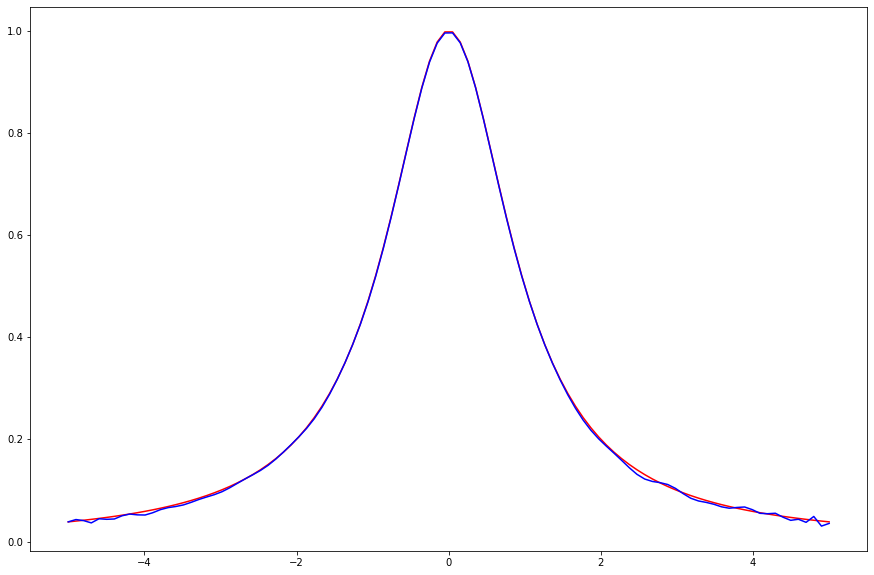

In [14]:
def draw_cz (n):
    arr = Czebyszewa (n, f, -5, 5)
    x = np.linspace(-5, 5, 100)
    fx = np.array([f(t) for t in x])
    Pnx = np.array([Pn(t, arr) for t in x])
    plt.figure(figsize=(15,10))
    plt.plot (x, fx, color = 'r')
    plt.plot (x, Pnx, color = 'b')
    
draw_cz (50)

-5
4.972609476841367
4.755282581475767
4.330127018922194
3.715724127386971
2.938926261462366
2.0336832153790017
1.039558454088796
1.4163847244119948e-15
-1.0395584540887968
-2.0336832153790003
-2.938926261462365
-3.71572412738697
-4.330127018922194
-4.755282581475767
-4.972609476841367
5


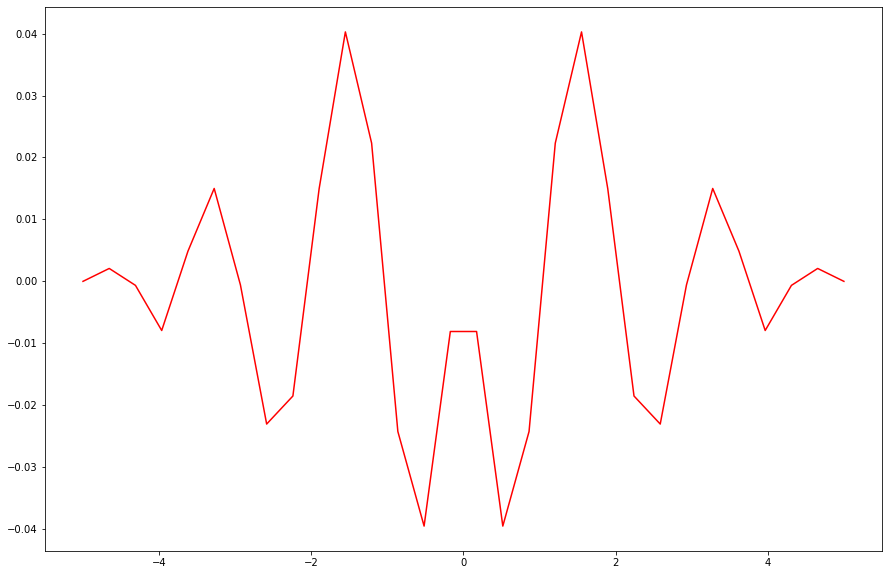

In [13]:
def draw_e_cz (n):
    arr = Czebyszewa (n, f, -5, 5)
    x = np.linspace(-5, 5, 30)
    ex = np.array([f(t) - Pn(t, arr) for t in x])
    plt.figure(figsize=(15,10))
    plt.plot (x, ex, color = 'r')

draw_e_cz (15)

Błąd interpolacji znacznie zmalał, nie występuje efekt Rungego. Jest to spowodowane doborem węzłów - nie są one równo oddalone od siebie.

## Funkcje sklejane - zadanie 3

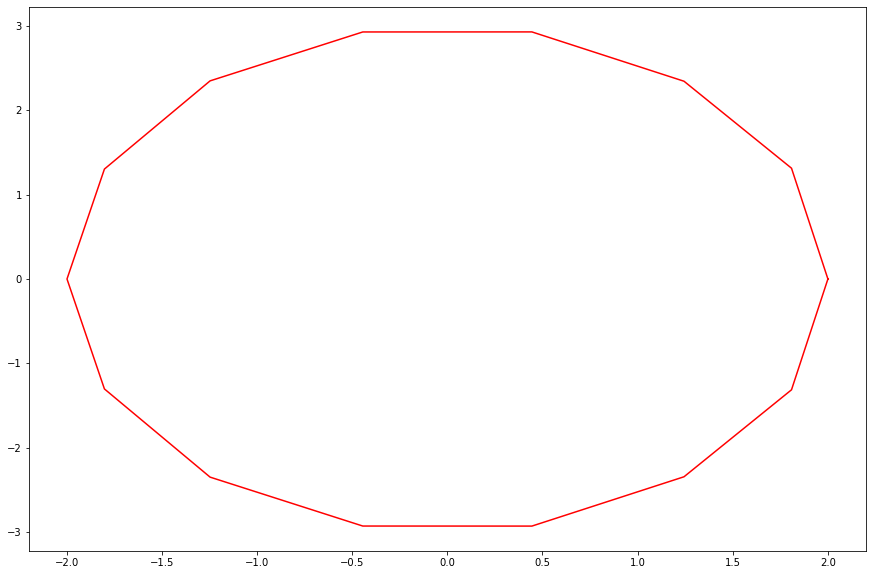

In [19]:
from scipy.interpolate import CubicSpline

def c_spline_ellipse (a, b):
    t = np.linspace(0, 2*pi, 10)
    xt = a * np.cos(t)
    yt = b * np.sin(t)
    x = CubicSpline (t, xt)
    y = CubicSpline (t, yt)
    T = np.linspace(0, 2*pi, 15)
    plt.figure(figsize=(15,10))
    plt.plot (x(T), y(T), color = 'r')
    
c_spline_ellipse (2, 3)